# Supervised Machine Learning Project

## Table of Contents

### 1. [Introduction](#1:Introduction)
- **1.1 [Project Objective](#1.1:Project-Objective)**
- **1.2 [Project Requirements](#1.2:Project-Requirements)**
- **1.3 [Dataset Description](#1.2:Dataset-Description)**

### 2. [Importing Necessary Libraries](#2:Importing-Necessary-Libraries)

### 3. [Data Loading and Initial Exploration](#3:Data-Loading-and-Initial-Exploration)

### 4. [Exploratory Data Analysis (EDA)](#4:Exploratory-Data-Analysis-(EDA))
- **4.1 [Distribution Analysis](#4.1:Distribution-Analysis)**
  - Correlation Analysis
  - Visualization of Data Distributions
- ADD ALL HERE LATER **ON*

### 5. [Target Variable and Train Test Split](#5:Target-Variable-and-Train-Test-Split)
- **5.1 [Baseline Defined](#5.1:Baseline-Defined)**
- **5.2 [`X` and `y` Defined](#5.2:X-and-y-Defined)**
- **5.3 [Train Test Split](#5.3:Train-Test-Split)**

### 6. [Data Preprocessing Pipeline](#6:Data-Preprocessing-Pipeline)
- **6.1 [Cleaning](#6.1:Cleaning)**
  - Handling Missing Values
    - Imputing Mean, Mode and so on
- **6.2 [Feature Engineering](#6.2:Feature-Engineering)**
  - Creating New Features
  - Feature Scaling
  - Feature Selection
- **6.3 [Final Preprocessing Pipeline](#6.3:Final-Preprocessing-Pipeline)**

### 7. [Evaluate Different Models](#7:Evaluate-Different-Models)
- **7.1 [Define Models](#7.1:Define-Models)**
- **7.2 [Evaluate Models](#7.2:Evaluate-Models-and-Different-Scalers)**
- **7.3 [Choose Best Models](#7.3:Choose-Best-Model)**

### 8. [Hyperparameter Tuning](#8:Hyperparameter-Tuning)
- **8.1 [Tuning Both Models](#8.1:Tuning-Both-Models)**
- **8.2 [Best Performing model](#8.2:Best-Performing-Model)**
  - Accuracy
  - Recall

### 9. [Predictions on Test](#9:Predictions-on-Test)
- **9.1 [Results](#9.1:Results)**
  - Scores
- **9.2 [Summary of Findings](#9.2:Summary-of-Findings)**
  - Proposed findings

### 10. [Conclusion](#10:Conclusion)
- **10.1 [Conclusion of Analysis](#10.1:Conclusion-of-Analysis)**
- **10.2 [Proposed Further Analysis](#10.2:Proposed-Further-Analysis)**

### 11. [References](#11:References)

### 12. [Appendix](#12:Appendix)

## 1:Introduction

### 1.1:Project-Objective
To predict whether a person makes more or less than 50k USD. Features include different socioeconomic factors such as education, relationsships, hours worked per week.

### 1.2:Project-Requirements
See requirements file.
* Seabornautomation Personal Methods
* Dataset
* Testset
* Optional:
  * `Better Comments Addon` for Visual Studio Code (id: *aaron-bond.better-comments*)

### 1.3:Dataset-Description
Consesus data in the USA from 1996?
- Dataset Source: https://archive.ics.uci.edu/dataset/2/adult
1. **age**:-------------------Age of the individual.
2. **workclass**:------------Type of employment (e.g., Private, Self-emp-not-inc, State-gov).
3. **fnlwgt**:----------------Census population weight. Number of people representable???.
4. **education**:------------Highest level of education attained (e.g., Bachelors, HS-grad).
5. **education-num**:------Numeric representation of education level.
6. **marital-status**:-------Marital status (e.g., Married, Divorced, Never-married).
7. **occupation**:----------Type of work performed (e.g., Adm-clerical, Exec-managerial).
8. **relationship**:---------Relationship status (e.g., Husband, Not-in-family).
9.  **race**:-----------------Race of the individual (e.g., White, Black).
10. **sex**:------------------Gender (Male or Female).
11. **capital-gain**:---------Capital gains income.
12. **capital-loss**:---------Capital loss.
13. **hours-per-week**:-----Number of hours worked per week.
14. **native-country**:------Country of origin.
15. **income**:--------------Income class, target variable (<=50K or >50K).


## 2:Importing-Necessary-Libraries

In [314]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# will also be imported as we go
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import os
os.getcwd()

'/Users/erikcarlstedt/Documents/NOD Bootcamp/cheat cheats and presentations/Methods & Functions'

In [320]:
 #? importing personal viz methods using seaborn
path_methods_functions = "/Users/erikcarlstedt/Documents/NOD Bootcamp/cheat cheats and presentations/Methods & Functions"
os.chdir(path_methods_functions)
import seabornautomation as sa

## 3:Data-Loading-and-Initial-Exploration

### Data Loading and Fixing

#### Train Data

In [86]:
path_dataset = "/Users/erikcarlstedt/Documents/NOD Bootcamp/Projects/Project 5 - Supervised ML/adult"
os.chdir(path_dataset)

#? Define column names based on the Adult Income dataset attributes
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

#? Load the dataset
df = pd.read_csv("adult.data", header=None, names=column_names, na_values=' ?')

#? Show the first few rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Test Data

In [87]:
path_dataset = "/Users/erikcarlstedt/Documents/NOD Bootcamp/Projects/Project 5 - Supervised ML/adult"
os.chdir(path_dataset)

#? Define column names based on the Adult Income dataset attributes
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

#? Load the dataset
df_test = pd.read_csv("adult.test", header=None, names=column_names, na_values=' ?')

#* here we see that we have one null result. this must be dropped.
df_test.isna().value_counts()

age    workclass  fnlwgt  education  education-num  marital-status  occupation  relationship  race   sex    capital-gain  capital-loss  hours-per-week  native-country  income
False  False      False   False      False          False           False       False         False  False  False         False         False           False           False     15060
       True       False   False      False          False           True        False         False  False  False         False         False           False           False       944
       False      False   False      False          False           False       False         False  False  False         False         False           True            False       255
       True       False   False      False          False           True        False         False  False  False         False         False           True            False        19
       False      False   False      False          False           True        False    

In [88]:
 #? looking into this row further, somekind of error row, must be dropped
df_test_null_target = df_test[df_test["income"].isna()]
df_test_null_target

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_test.drop(index=0, inplace=True)

### Dataset Overview

In [90]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [93]:
df.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [94]:
df["fnlwgt"].sum() # what does this mean exactly

6179373392

## 4:Exploratory-Data-Analysis-(EDA)

### Unique values in each column

In [95]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [96]:
sa.unique_values(df,17)

age has 73 unique

workclass has 8 unique_values
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt has 21648 unique

education has 16 unique_values
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num has 16 unique_values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status has 7 unique_values
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation has 14 unique_values
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship has 6 unique_values
[' Not-in-fam

In [97]:
df["capital-gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [98]:
df["native-country"].value_counts() 
#* here we see that there is only one holland country, 
  #* leading to problems when working on the training data. 
#* will use ignore for this

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

### Checking out Nulls

<Axes: >

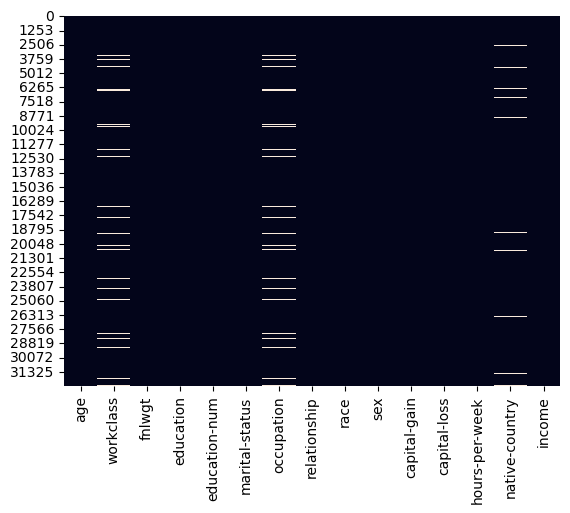

In [99]:
sns.heatmap(df.isnull(), cbar=False)

### Plot each column with target variable as hue.
Alows us to see interesting correlation for each feature with the target variable, Income

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/1565168318.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


AttributeError: module 'seabornautomation' has no attribute 'countplots_by_target_custom'

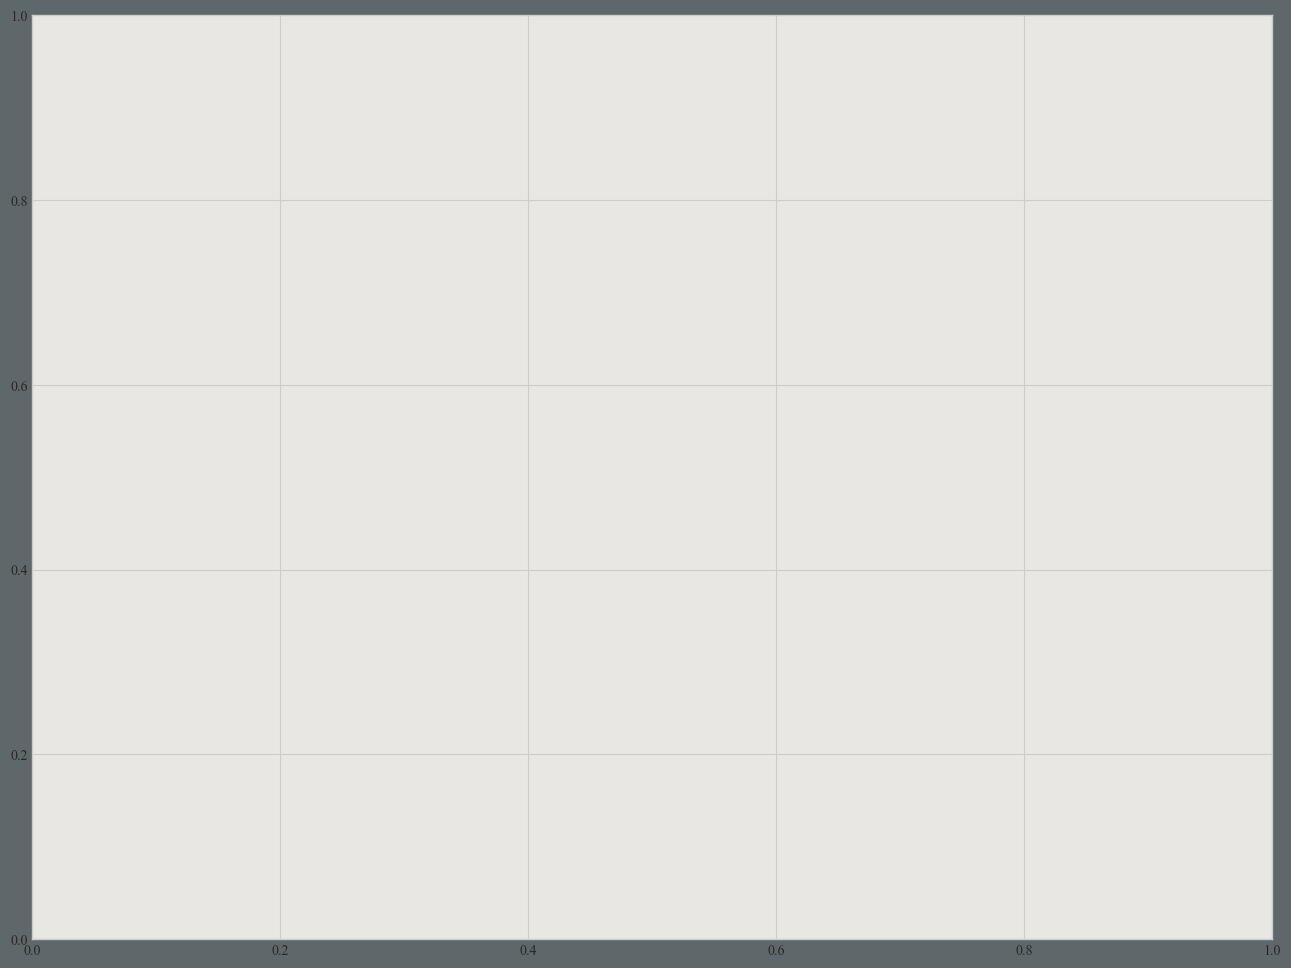

In [319]:
# Set the desired style
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with custom background colors
plt.figure(figsize=(16, 12))
text_color = 'white'
plt.rcParams['text.color'] = text_color
plt.gca().set_facecolor('#e8e7e3')
plt.gcf().set_facecolor('#5e676a')

#! TAKES LONG TIME TO RUN
#? countplots(cols, data, width_factor=1, height_factor=1):
sa.countplots_by_target_custom(df.columns, df, df["income"])

In [101]:
df_nulls = df[df.isna().any(axis=1)]
#sa.countplots_by_target(df_nulls.columns, df_nulls, df_nulls["income"])
# here we see that there looks to be skewed towards "rich" people that have some kind of Null value, indicating importance of these rows.

### Summary of findings:
* Rows with nulls looks to be skewed towards over 50K target value, indicating importance of these rows.
  * Drop is therefore not an options
* Alot of unique values. for many columns
  * Might have to consider dropping some of them or combining some varaibles
* Only one person from Holland, causing problems when working on training data
  * Will have to use ignore in OneHotEncoder for this

## 5:Target-Variable-and-Train-Test-Split

### 5.1:Baseline-Defined
**Majority Class**: Always predict the most frequent class in the dataset. Calculate its accuracy to set as a baseline.

In [102]:
baseline_results = list(df.income.value_counts())

In [103]:
 #? Majority Class: Always predict the most frequent class in the dataset. 
#? Calculate its accuracy to set as a baseline.
baseline_accuracy = 1 - baseline_results[1] / baseline_results[0]
baseline_accuracy

0.6828074433656958

### 5.2:X-and-y-Defined

In [236]:
X = df.drop("income", axis=1)
y = df["income"]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [237]:
y.isna().value_counts()

False    32561
Name: income, dtype: int64

In [238]:
X_test = df_test.drop("income", axis=1)
y_test = df_test["income"]
print(X_test.shape)
print(y_test.shape)

(16281, 14)
(16281,)


In [239]:
y_test.isna().value_counts()

False    16281
Name: income, dtype: int64

### 5.3:Train-Test-Split
* Load test data

In [242]:
X_train = X
y_train = y

In [243]:
X_test = X_test
y_test = y_test

* could also be done with test_train_split from sklearn if you would like to do additional testing before final test data

In [244]:
# add later

* Transforming Target into ones and zeroes for model

In [246]:
y_train_original = y_train
y_test_original = y_test

 #? transform >50 to 1 and <=50 to 0 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [247]:
print (y_train)
print (y_test)

[0 0 0 ... 0 0 1]
[0 0 1 ... 0 0 1]


In [113]:
print (y_train_original)
print (y_test_original)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object
1         <=50K.
2         <=50K.
3          >50K.
4          >50K.
5         <=50K.
          ...   
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280     <=50K.
16281      >50K.
Name: income, Length: 16281, dtype: object


## 6:Data-Preprocessing-Pipeline

In [114]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector

In [115]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 6.1:Cleaning
* imputing median value for missing numerical values
  * 

In [116]:
def trans_numerical(scaler = StandardScaler()):
    #? preprocess num columns
    num_cols = X.select_dtypes("number").columns #* could be done with make_column_selector

    #? apply standard scaler only, since there are no numerical nulls in our dataset
    num_trans = make_pipeline(
        scaler
    )
    
    return num_trans, num_cols


### 6.2:Feature-Engineering

In [117]:
def trans_categories ():
    #? preprocess cat columns
    cat_cols = X.select_dtypes("object").columns #* could be done with make_column_selector

    #? for object, fill_value with most frequentone
    #? since our nulls are so sparse
    cat_trans = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown="ignore", drop="if_binary") 
        # in case of one unique in train VS test
    )
    
    return cat_trans, cat_cols

### 6.3:Final-Preprocessing-Pipeline

In [118]:
from sklearn.compose import make_column_transformer
def make_preprocessor(scaler = StandardScaler()):
    #? put them all in here so that i can easily call on this and 
    #? then test out different scalers.
    
    #? using method above
    num_trans, num_cols = trans_numerical(scaler=scaler)
    
    #? using method above
    cat_trans, cat_cols = trans_categories()
    
    #? final preprocessor
    preprocessor = make_column_transformer(
        (num_trans, num_cols),
        (cat_trans, cat_cols)
    )
    return preprocessor


## 7:Evaluate-Different-Models

### 7.1:Define-Models

In [119]:
# rfr
# gradient boosting regressor
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor

classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    SVC(),
    KNeighborsClassifier()#,
    #GradientBoostingRegressor()#,
    #GaussianNB()
]

### 7.2:Evaluate-Models-and-Different-Scalers

#### Testing Different scaler on given classifier

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler(),
    QuantileTransformer(),
    PowerTransformer(),
    Normalizer(),
]

In [121]:
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()

for scaler in scalers:
    preprocessor = make_preprocessor(scaler=scaler)
    
    print(f"Fitting: {scaler}")
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")## accuracy is the standard one anyhow
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier} using {scaler}: {grid.best_score_}")
    print("")

Fitting: StandardScaler()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using StandardScaler(): 0.8553792292564747

Fitting: MinMaxScaler()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using MinMaxScaler(): 0.8538743482605756

Fitting: RobustScaler()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using RobustScaler(): 0.853198653722606

Fitting: MaxAbsScaler()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using MaxAbsScaler(): 0.8539357874687216

Fitting: QuantileTransformer()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using QuantileTransformer(): 0.853260031628295

Fitting: PowerTransformer()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using PowerTransformer(): 0.8492675865430357

Fitting: Normalizer()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier() using Normalizer(): 0.8389792282756355



In [122]:
"""
Train score for RandomForestClassifier() using StandardScaler(): 0.8532600646373101

Train score for RandomForestClassifier() using MinMaxScaler(): 0.8534135989974313

Train score for RandomForestClassifier() using RobustScaler(): 0.8538435319872446

Train score for RandomForestClassifier() using MaxAbsScaler(): 0.8545192831120975

Train score for RandomForestClassifier() using QuantileTransformer(): 0.8554713008305821

Train score for RandomForestClassifier() using PowerTransformer(): 0.848561292648119

Train score for RandomForestClassifier() using Normalizer(): 0.8398392310068956


Above we can see that the QuantileTransformer() seems to be the best performing:
Lets try it out on different classifiers

"""

chosen_scaler = QuantileTransformer()

#### Testing different models/classifiers with chosen scaler

In [123]:
from sklearn.model_selection import GridSearchCV

for classifier in classifiers:
    preprocessor = make_preprocessor(scaler=chosen_scaler)
    
    print(f"Fitting: {classifier}")
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")## accuracy is the standard one anyhow
    grid.fit(X_train, y_train)
    
    print(f"Train score for {classifier}: {grid.best_score_}")
    print("")

Fitting: LogisticRegression(max_iter=1000)


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for LogisticRegression(max_iter=1000): 0.845459397779757

Fitting: DecisionTreeClassifier()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for DecisionTreeClassifier(): 0.8145327753112184

Fitting: RandomForestClassifier(n_jobs=-1)


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for RandomForestClassifier(n_jobs=-1): 0.8533215415700445

Fitting: SVC()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for SVC(): 0.8442923121815337

Fitting: KNeighborsClassifier()


/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score for KNeighborsClassifier(): 0.8254354596420465



### 7.3:Choose-Best-Model
* Will choose both RandomForrestClassifier() and SVC() since they performed best.
* Onto hyperparameter tuning!

In [124]:
#?chosen classifiers
RandomForestClassifier()
SVC()

SVC()

## 8:Hyperparameter-Tuning

### 8.1:Tuning-Both-Models

#### - RandomforestClassifier()

In [125]:
 #? tested param grid hyperparameters
param_grid_rf = {
    "randomforestclassifier__min_samples_leaf":    [16, 20], ## minimum samples per end leaf
    "randomforestclassifier__max_depth":           [1, 20, 60], ## max decisiontree length
    "randomforestclassifier__n_estimators":        [10, 200, 800] ## max decisiontrees
}
#? final param grid hyperparameters
param_grid_rf = {
    "randomforestclassifier__min_samples_leaf":    [16, 30], ## minimum samples per end leaf
    "randomforestclassifier__max_depth":           [None, 20, 60], ## max decisiontree length
    "randomforestclassifier__n_estimators":        [10, 200, 400] ## max decisiontrees
}


classifier = RandomForestClassifier(n_jobs=-1)

preprocessor = make_preprocessor(scaler=chosen_scaler)

pipe = make_pipeline(preprocessor, classifier)

grid_rf = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy"
)

grid_rf.fit(X_train, y_train)

print(f"Best Score:  {grid_rf.best_score_}")
print(f"Best params: {grid_rf.best_params_}")

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/l

Best Score:  0.8585425916264239
Best params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 400}


In [126]:
"""
Elapsed time: Circa 1 minute
Best Score:  0.8582969291053123
Best params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 18, 'randomforestclassifier__n_estimators': 200}
Scaler = StandardScaler
"""

"""
Elapsed time: Circa 1 minute
Best Score:  0.858419783943736
Best params: {'randomforestclassifier__max_depth': 60, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}
Scaler = StandardScaler()
"""

"""  ## BEST SCORE
Best Score:  0.8585118932424323
Best params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}
Scaler = QuantileTransformer()
"""


"  ## BEST SCORE\nBest Score:  0.8585118932424323\nBest params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}\nScaler = QuantileTransformer()\n"

#### - SVC()
Support vector machine

In [128]:
param_grid_svc = {
     'svc__C': [0.1, 1, 10, 100, 1000] # higher C will make model more "strict" (risk for overfitting)
                                        # how big your clusters will be, penilizes outliers
    ,'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001]# higher gamma will be more "strict"
                                                 # hmm   
    , "svc__kernel": ["rbf", "sigmoid"]
}

param_grid_svc = {
     'svc__C': [1]
    , "svc__kernel": ["rbf"]
    ,'svc__gamma': [1, 0.1, 0.01]
}

classifier = SVC()
pipe = make_pipeline(preprocessor, classifier)

grid_svc = GridSearchCV(
    estimator=pipe
    ,param_grid=param_grid_svc
    ,cv=5
    ,scoring="accuracy"
    )

grid_svc.fit(X_train, y_train)

print("Best score: ", grid_svc.best_score_)
print("Best params: ", grid_svc.best_params_)

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best score:  0.8443844874982599
Best params:  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [129]:
"""
Elapsed time: Circa 10 minutes.
Best score:  0.8562392084098672
Best params:  {'svc__C': 1, 'svc__kernel': 'rbf'}
"""

"""
Elapsed time: 37 minutes!
Best score:  0.856945610762976
Best params:  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
"""

"\nElapsed time: 37 minutes!\nBest score:  0.856945610762976\nBest params:  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}\n"

### 8.2:Best-Performing-Model

In [130]:
trained_models = {
    "SVC": grid_svc,
    "RandomForest": grid_rf
}

for name, model in trained_models.items():
    score = model.score(X_train, y_train)
    params = model.best_params_

    print(f"Score for {name}: {score}")
    print(f"With parameters {params}\n")

Score for SVC: 0.8521544178618593
With parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Score for RandomForest: 0.8634869936427014
With parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 400}



In [131]:
"""
Score for SVC: 0.8692300605018274
With parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Score for RandomForest: 0.8634869936427014
With parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}
"""

#? Still going to test both on test data. 

"\nScore for SVC: 0.8692300605018274\nWith parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}\n\nScore for RandomForest: 0.8634869936427014\nWith parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}\n"

## 9:Predictions-on-Test

### 9.1:Results

In [132]:
trained_models = {
    "SVC": grid_svc,
    "RandomForest": grid_rf
}

for name, model in trained_models.items():
    score = model.score(X_test, y_test)
    params = model.best_params_

    print(f"Score for {name}: {score}")
    print(f"With parameters {params}\n")

Score for SVC: 0.847122412628217
With parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Score for RandomForest: 0.8593452490633253
With parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 400}



In [133]:
"""
Score for SVC: 0.8578711381364781
With parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Score for RandomForest: 0.8600823045267489
With parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}
"""

#? Here we can see that RandomForrest came out on top in the end.
#? Lets check out the results even further.

"\nScore for SVC: 0.8578711381364781\nWith parameters {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}\n\nScore for RandomForest: 0.8600823045267489\nWith parameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 16, 'randomforestclassifier__n_estimators': 200}\n"

In [134]:
best_model = grid_rf.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('quantiletransformer',
                                                                   QuantileTransformer())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=16, n_estimators=400,
                                        n_jobs=-1))])

#### RESULTS BELOW ARE WITH y_test and X_test

In [321]:
y_train2 = y_train
X_train2 = X_train

y_train = y_test
X_train = X_test

#### Confusion Matrix

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/3768972297.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


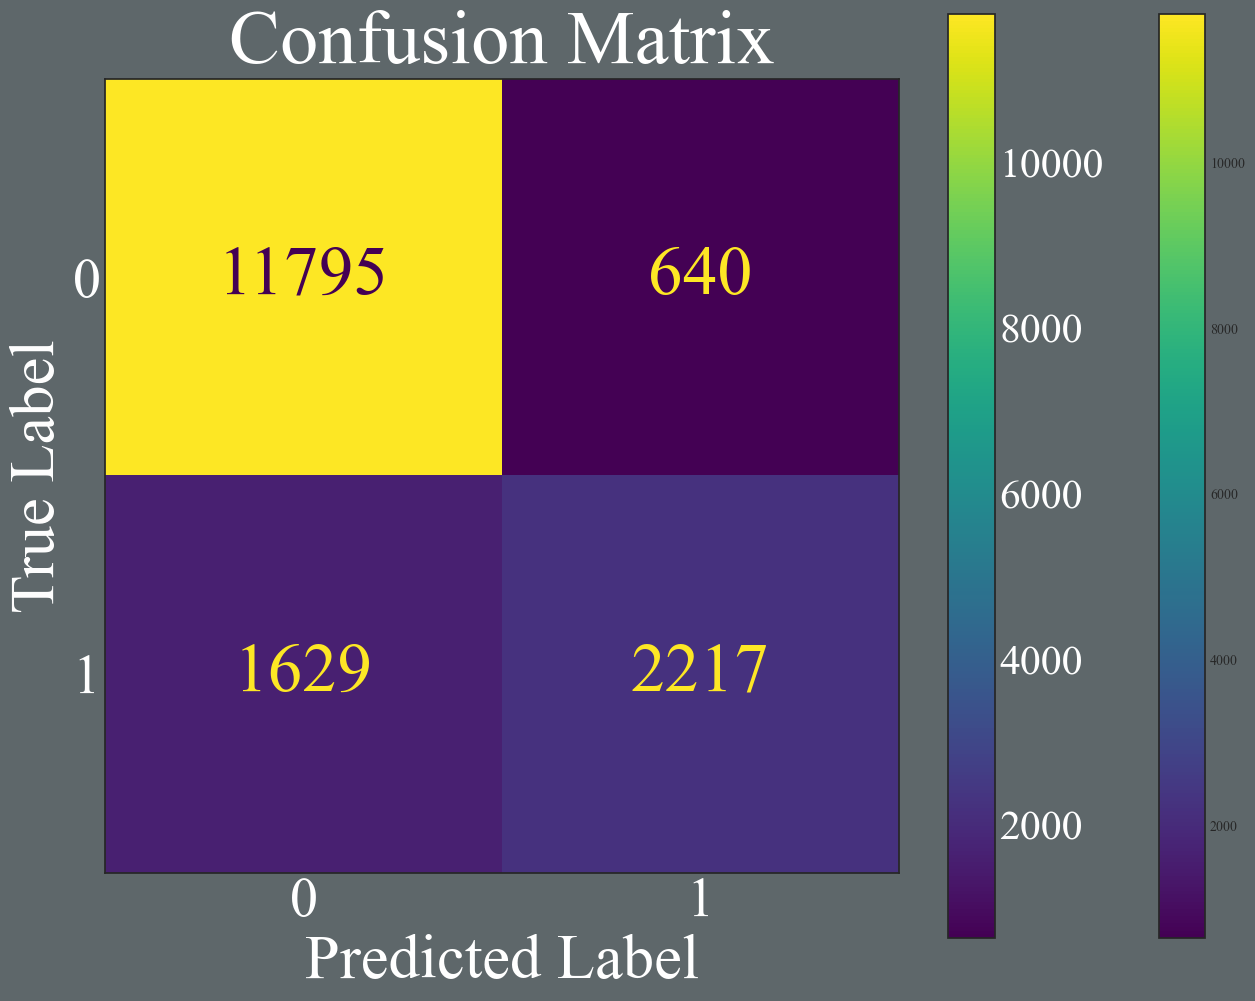

acc_score = 0.8606350961243167


In [331]:
# Import libraries
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

pred = best_model.predict(X_train)

cm = confusion_matrix(y_train, pred)

# Stylistic Choices
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Times New Roman'  # Replace 'Helvetica' with the font you want
fig, ax = plt.subplots(figsize=(16, 12))

text_color = 'white'
plt.rcParams['text.color'] = text_color
ax.set_facecolor('#e8e7e3')  # Inside grid color
fig.patch.set_facecolor('#5e676a')  # Outside grid color

# Plotting Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(ax=ax)

# Set colorbar facecolor
#disp.colorbar.set_facecolor('#e8e7e3')

# Title and Labels
plt.title('Confusion Matrix', fontsize=55, color=text_color)
plt.xlabel('Predicted Label', fontsize=45, color=text_color)
plt.ylabel('True Label', fontsize=45, color=text_color)

# Tick Customization
plt.tick_params(axis='both', which='major', labelsize=40, colors=text_color)

# textsize
font_size = 50  # Replace with your desired font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        disp.text_[i, j].set_text(str(cm[i, j]))
        disp.text_[i, j].set_size(font_size)

cbar = plt.colorbar(disp.im_, ax=ax)
cbar.ax.tick_params(labelsize=30, colors=text_color)


plt.show()

print(f"acc_score = {accuracy_score(y_train, best_model.predict(X_train))}")

In [323]:
true_positive = cm[1, 1]
false_negative = cm[1, 0]
false_positive = cm[0, 1]
true_negative = cm[0, 0]

print(f"True Positives (>50k) : {true_positive}")
print(f"False Negatives       : {false_negative}")
print(f"False Positives       : {false_positive}")
print(f"True Negatives (<=50k): {true_negative}")

True Positives (>50k) : 4639
False Negatives       : 3202
False Positives       : 1228
True Negatives (<=50k): 23492


In [324]:
"""
Result:
True Positives (>50k) : 4639
False Negatives       : 3202
False Positives       : 1228
True Negatives (<=50k): 23492
"""

'\nResult:\nTrue Positives (>50k) : 4639\nFalse Negatives       : 3202\nFalse Positives       : 1228\nTrue Negatives (<=50k): 23492\n'

#### CHECKING ALL SCORES:

In [332]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_train  # Replace with true labels

accuracy = accuracy_score(y_true, pred)
precision = precision_score(y_true, pred)
recall = recall_score(y_true, pred)
f1 = f1_score(y_true, pred)

# Print the scores
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Accuracy: 0.86, Precision: 0.78, Recall: 0.58, F1-Score: 0.66


#### Most important Features

In [325]:
 #? extracting these, since they are only used before inside a method
num_trans, num_cols = trans_numerical(scaler=chosen_scaler)
cat_trans, cat_cols = trans_categories()

In [326]:
 #? getting the names of all steps the model takes
best_model.named_steps.keys()
#* using "columntransformer" key
preprocessor_key = "columntransformer"

#? checking columntransformer for onehot encoder key
best_model.named_steps['columntransformer'].named_transformers_.keys()
#* using "pipeline-2" key
onehot_key = "pipeline-2"

In [327]:
import matplotlib.pyplot as plt
import numpy as np

#? Using code cell above for keys for preprocess and onehot encoder
onehot_features = best_model.named_steps[preprocessor_key].named_transformers_[onehot_key].get_feature_names_out(input_features=cat_cols)

#? Combine with numeric features
all_features = np.concatenate([num_cols, onehot_features])

#? Get the importances
importances = best_model.named_steps['randomforestclassifier'].feature_importances_

#? Getting 10 first Original names
top_n = 10
indices = np.argsort(importances)[::-1]
print("Original top 10 feature names:", all_features[indices][:top_n])

Original top 10 feature names: ['capital-gain' 'marital-status_ Married-civ-spouse' 'education-num'
 'relationship_ Husband' 'age' 'marital-status_ Never-married'
 'hours-per-week' 'capital-loss' 'occupation_ Exec-managerial'
 'education_ Bachelors']


##### Plot Important Features

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/3875764662.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/3875764662.py:38: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(decreasing_font_sizes[i])


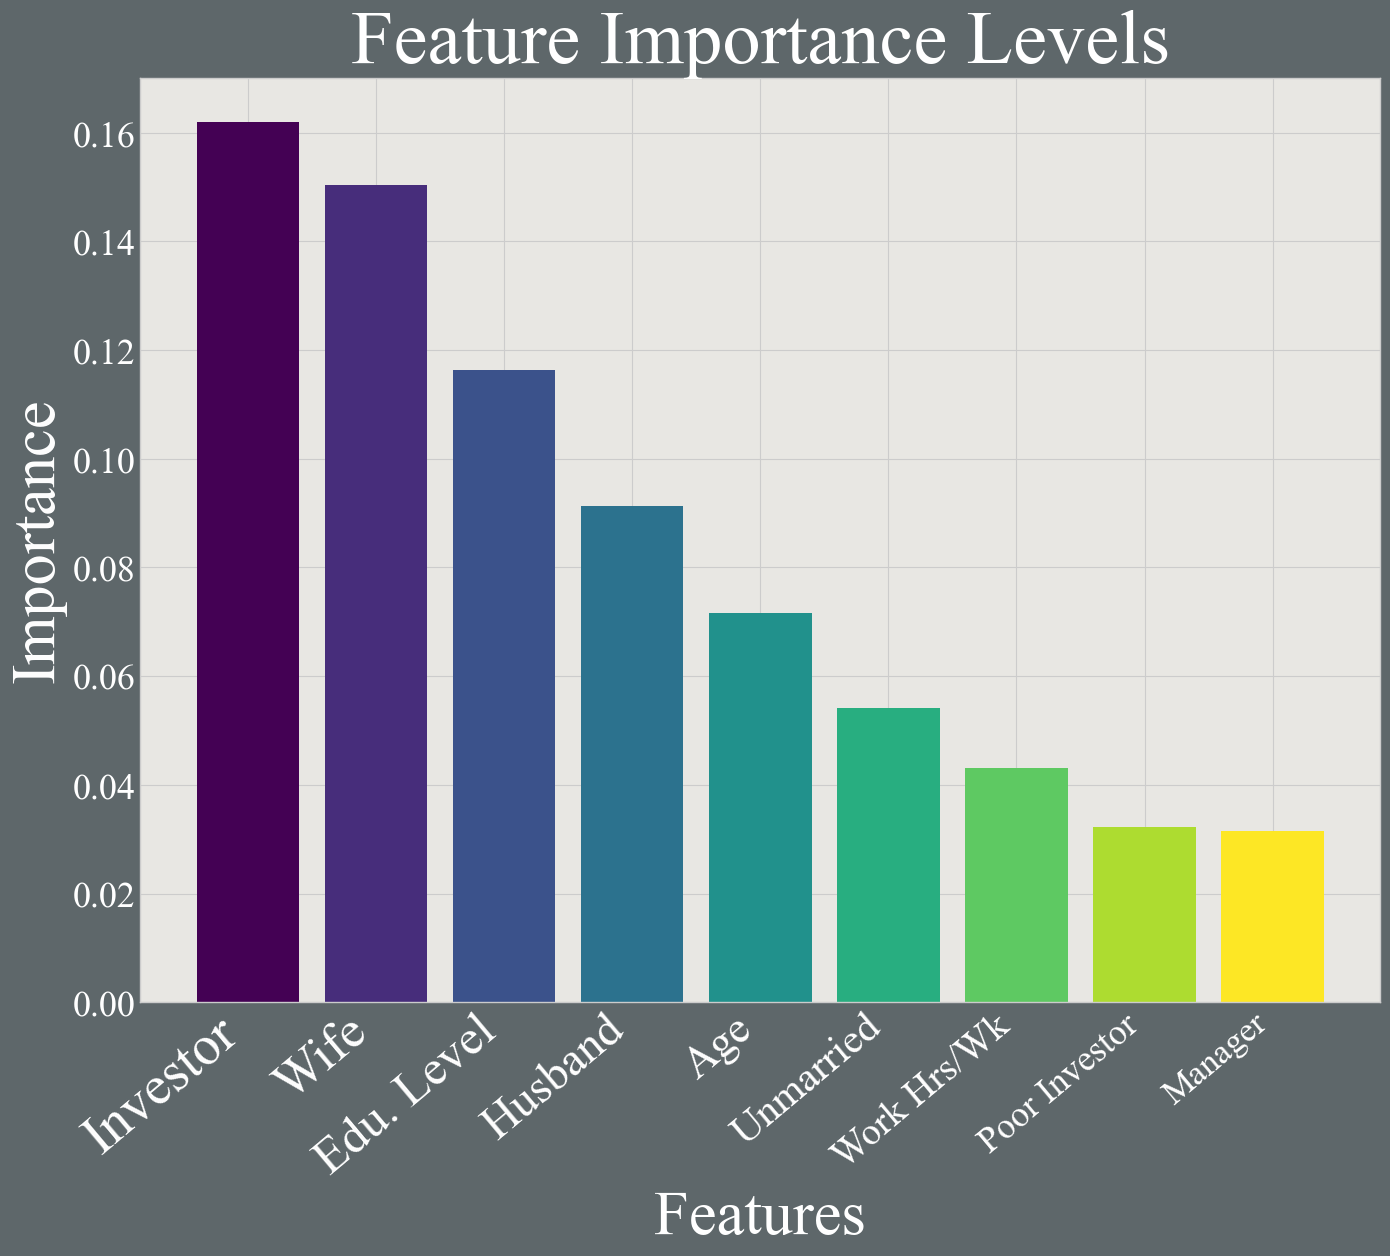

In [328]:
#? Custom names for the features to make it more clear
custom_names = ["Investor", "Being a Wife", 'Education Level', 
                'Being a Husband', 'Age', 'Not Married', 
                'Hours Worked per Week', 'Bad Investor', 'Manager']

custom_names = ["Investor", "Wife", "Edu. Level", "Husband", "Age", 
                "Unmarried", "Work Hrs/Wk", "Poor Investor", "Manager"]


#? Sort and plot
top_n = 9
indices = np.argsort(importances)[::-1]

#? choose style
plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-deep')
#plt.style.use('dark_background')
#plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'

#? plot create
plt.figure(figsize=(16, 12))

#? color custom
text_color = 'white'
plt.rcParams['text.color'] = text_color # text color to white
plt.gca().set_facecolor('#e8e7e3') # inside grid
plt.gcf().set_facecolor('#5e676a') # outside grid

#? bars create
plt.title("Feature Importance Levels", fontsize=55, color=text_color)
bars = plt.bar(range(top_n), importances[indices][:top_n], color=plt.cm.viridis(np.linspace(0, 1, top_n)))  # For example, using viridis

#? tick customization
plt.xticks(range(top_n), custom_names, rotation=40, ha="right")
decreasing_font_sizes = [40, 38, 36, 34, 32, 30, 28, 26, 25]
for i, tick in enumerate(plt.gca().xaxis.get_major_ticks()):
    tick.label.set_fontsize(decreasing_font_sizes[i])
plt.yticks(fontsize=26)
plt.tick_params(axis='x', colors=text_color)
plt.tick_params(axis='y', colors=text_color)

#? label customization
plt.xlabel("Features", fontsize=45, color=text_color)
plt.ylabel("Importance", fontsize=45, color=text_color)

#? show plot
plt.show()




##### Important features for being poor

In [329]:
from sklearn.multiclass import OneVsRestClassifier

# Your existing parameters
params = {'max_depth': None, 'min_samples_leaf': 16, 'n_estimators': 200}

# Assume X_train, y_train are your training data and labels
# X_train, y_train = your_data, your_labels

# make_pipeline with preprocess

rf_estimator = make_pipeline(
    preprocessor,
    RandomForestClassifier(max_depth=params['max_depth'], 
                                                 min_samples_leaf=params['min_samples_leaf'],
                                                 n_estimators=params['n_estimators'])

)

# Create the OneVsRest model with your specific RandomForest settings
ovr = OneVsRestClassifier(rf_estimator)

# Fit the model
ovr.fit(X_train, y_train)

# Get feature importances for each class
for idx, estimator in enumerate(ovr.estimators_):
    print(f"Feature importances for class {idx}: {estimator.named_steps['randomforestclassifier'].feature_importances_}")


Feature importances for class 0: [6.27500237e-02 1.20046392e-02 1.14611856e-01 1.47310693e-01
 3.14458121e-02 4.38095449e-02 2.19037379e-03 1.22799758e-03
 0.00000000e+00 4.10350732e-03 4.81831713e-03 4.09209278e-03
 4.33691087e-04 0.00000000e+00 1.29213041e-03 1.99153089e-03
 1.23593111e-04 2.48458834e-04 4.44557253e-04 2.40890433e-03
 8.50310032e-04 1.43790935e-03 1.02409458e-03 2.75214592e-02
 3.91593448e-03 1.06534707e-02 1.70485513e-02 0.00000000e+00
 1.03583538e-02 4.97134230e-03 9.65045846e-03 0.00000000e+00
 1.61868684e-01 1.87500033e-04 6.10655844e-02 1.08418187e-03
 1.23561867e-03 1.18433023e-03 0.00000000e+00 2.25207778e-03
 2.82416016e-02 3.14683538e-03 1.91223885e-03 2.06533145e-03
 8.76762340e-03 3.43400271e-06 9.43847503e-03 4.33184136e-04
 1.80604894e-03 8.53999697e-04 8.15814958e-04 1.08377548e-01
 2.01352036e-02 1.14456351e-03 1.73384148e-02 8.10925957e-03
 1.27923752e-02 6.28401521e-06 2.19581765e-04 1.24959430e-03
 4.58499744e-06 1.15794023e-03 1.63010210e-02 0.0000

###### plotting important features for being poor

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/2631401069.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_11931/2631401069.py:33: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(decreasing_font_sizes[i])


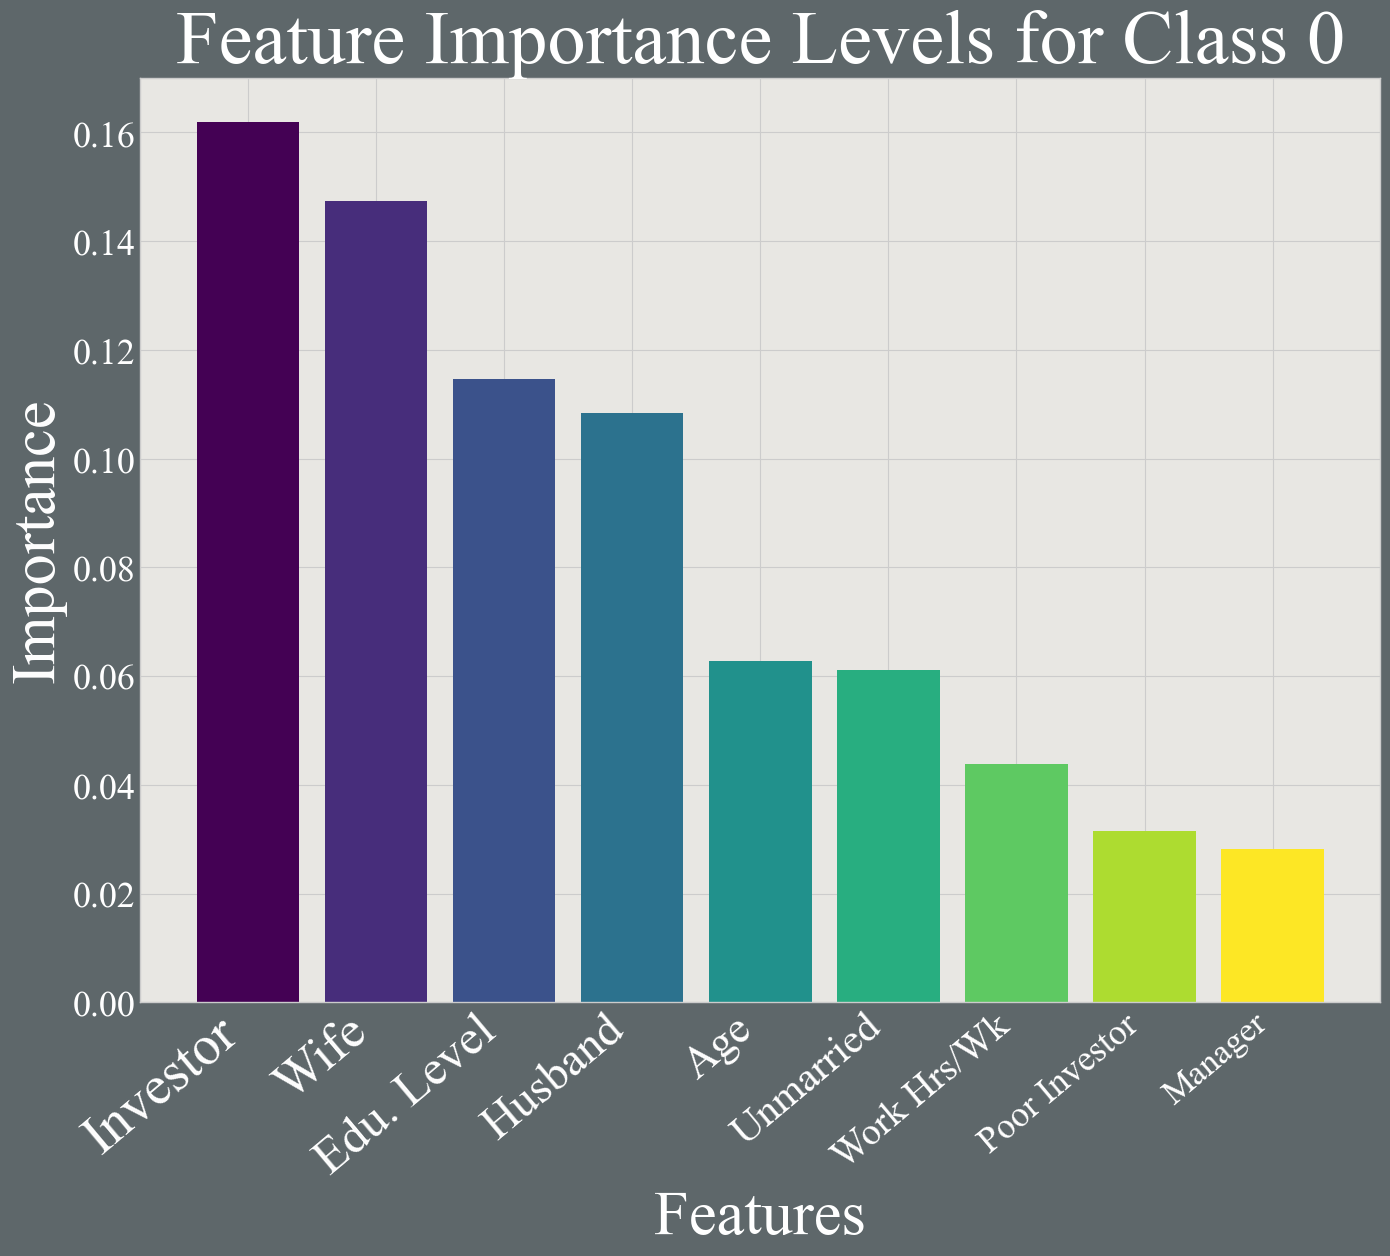

In [330]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  # Replace with your actual preprocessor
import numpy as np
import matplotlib.pyplot as plt

# Custom names for the features
custom_names = ["Investor", "Wife", "Edu. Level", "Husband", "Age", 
                "Unmarried", "Work Hrs/Wk", "Poor Investor", "Manager"]

# Get feature importances for each class and plot them
for idx, estimator in enumerate(ovr.estimators_):
    importances = estimator.named_steps['randomforestclassifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    top_n = 9

    plt.figure(figsize=(16, 12))
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['font.family'] = 'Times New Roman'
    
    text_color = 'white'
    plt.rcParams['text.color'] = text_color
    plt.gca().set_facecolor('#e8e7e3')
    plt.gcf().set_facecolor('#5e676a')
    
    plt.title(f"Feature Importance Levels for Class {idx}", fontsize=55, color=text_color)
    bars = plt.bar(range(top_n), importances[indices][:top_n], color=plt.cm.viridis(np.linspace(0, 1, top_n)))
    
    plt.xticks(range(top_n), custom_names, rotation=40, ha="right")
    decreasing_font_sizes = [40, 38, 36, 34, 32, 30, 28, 26, 25]
    for i, tick in enumerate(plt.gca().xaxis.get_major_ticks()):
        tick.label.set_fontsize(decreasing_font_sizes[i])
        
    plt.yticks(fontsize=26)
    plt.tick_params(axis='x', colors=text_color)
    plt.tick_params(axis='y', colors=text_color)
    
    plt.xlabel("Features", fontsize=45, color=text_color)
    plt.ylabel("Importance", fontsize=45, color=text_color)
    
    plt.show()


##### specific feature importance

In [305]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Assuming best_model is your trained RandomForest model
# Assuming X_train contains your training data

# Selecting features based on your custom names
features = [0, 1, 2]  # Replace these with the actual indices of the features you're interested in, based on your custom names

# Plotting the Partial Dependence Plots
# Please replace best_model and X_train with your actual model and data when running this code
plot_partial_dependence(best_model, X_train, features)

# Uncomment the below lines when running the code on your machine
plt.suptitle('Partial dependence of income prediction\n on various features')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()





ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/inspection/__init__.py)

### Clustering Analysis to see differences between the classes:

### 9.2:Summary-of-Findings

## 10:Conclusion

### 10.1:Conclusion-of-Analysis

### 10.2:Proposed-Further-Analysis

## 11:References

## 12:Appendix